In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from cmath import exp, pi

def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

print( ' '.join("%5.3f" % abs(f) 
                for f in fft([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])) )

4.000 2.613 0.000 1.082 0.000 1.082 0.000 2.613


In [1]:
# Importing the necessary functions from the cmath module
from cmath import exp, pi

# Defining the FFT function that takes an input sequence x
def fft(x):
    # Getting the length of the input sequence
    N = len(x)
    # If the length of the input sequence is 1 or less, return the sequence itself
    if N <= 1:
        return x
    
    # Recursively computing the FFT of the even-indexed elements and odd-indexed elements of x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    
    # Computing the "twiddle factors" used in the FFT algorithm
    T = [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    
    # Combining the even-indexed and odd-indexed parts of the FFT to compute the final FFT
    return [even[k] + T[k] for k in range(N//2)] + [even[k] - T[k] for k in range(N//2)]

# Computing the FFT of the input sequence [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
# and printing the absolute values of the FFT in a formatted string
print(' '.join("%5.3f" % abs(f) for f in fft([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])) )


4.000 2.613 0.000 1.082 0.000 1.082 0.000 2.613


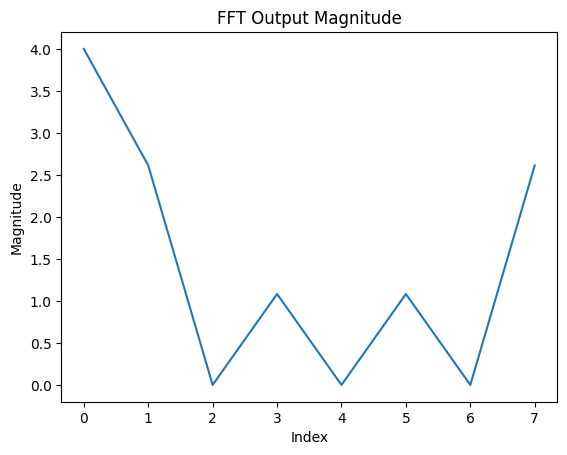

In [4]:
# Importing the necessary modules
import matplotlib.pyplot as plt

# Defining a function to visualize the FFT of an input sequence x
def visualize_fft(x):
    # Computing the FFT of the input sequence using the previously defined fft() function
    fft_output = fft(x)
    # Computing the magnitudes of the FFT coefficients
    magnitude = [abs(f) for f in fft_output]
    # Plotting the magnitudes using Matplotlib's plot() function
    plt.plot(magnitude)
    # Adding x and y axis labels
    plt.xlabel('Index')
    plt.ylabel('Magnitude')
    # Adding a title to the plot
    plt.title('FFT Output Magnitude')
    # Displaying the plot
    plt.show()

# Visualizing the FFT of the input sequence [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
visualize_fft([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])

/tmp/ipykernel_60/1363237131.py:26: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(np.abs(y), use_line_collection=True)


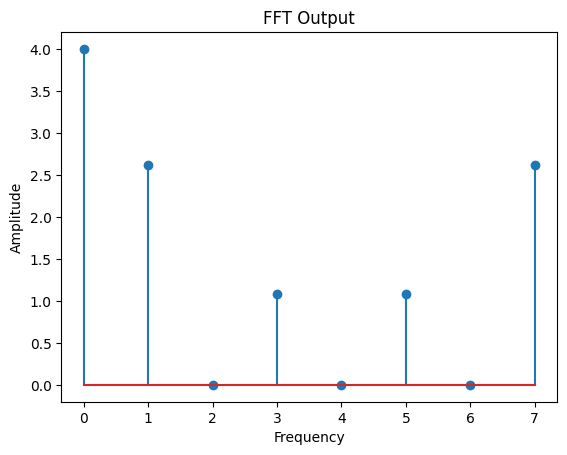

In [5]:
# Importing the necessary modules
import matplotlib.pyplot as plt
import numpy as np

# Defining the FFT function
def fft(x):
    N = len(x)
    # Base case for recursion, return the input array if its length is less than or equal to 1
    if N <= 1: return x
    # Recursively computing the FFT of the even-indexed elements and odd-indexed elements of the input array
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    # Computing the "twiddle factors" (complex exponentials) used in the FFT
    T= [np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)]
    # Combining the even-indexed and odd-indexed FFTs using the twiddle factors
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

# Defining the input sequence x
x = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
# Computing the FFT of x using the fft() function
y = fft(x)

# Creating a stem plot of the magnitude of the FFT coefficients using Matplotlib's stem() function
fig, ax = plt.subplots()
ax.stem(np.abs(y), use_line_collection=True)
# Adding x and y axis labels
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
# Adding a title to the plot
ax.set_title('FFT Output')
# Displaying the plot
plt.show()

In [5]:
from numpy.fft import fft
from numpy import array
a = array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])
print( ' '.join("%5.3f" % abs(f) for f in fft(a)) )

4.000 2.613 0.000 1.082 0.000 1.082 0.000 2.613


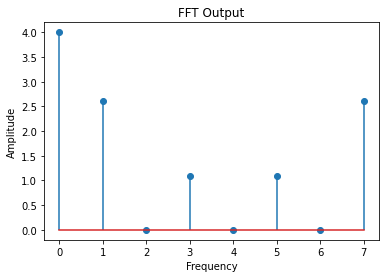

In [6]:
import matplotlib.pyplot as plt
from numpy.fft import fft
from numpy import array

a = array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])
y = fft(a)

fig, ax = plt.subplots()
ax.stem(np.abs(y), use_line_collection=True)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_title('FFT Output')
plt.show()


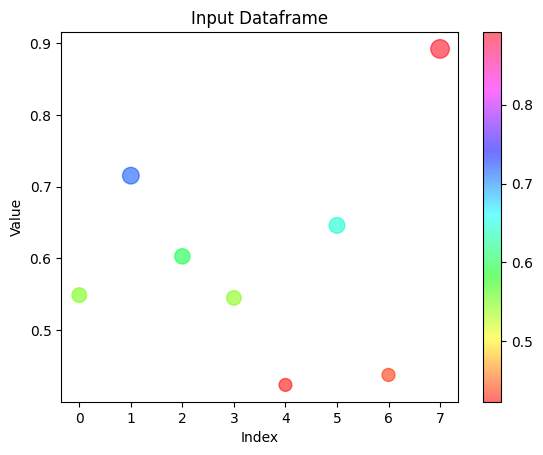

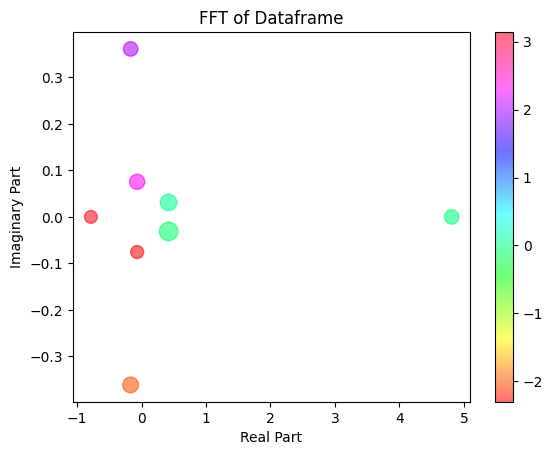

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a random input dataframe
np.random.seed(0)
df = pd.DataFrame({'x': np.random.rand(8)})

# Calculate the FFT of the dataframe using numpy
X = np.fft.fft(df['x'].values)

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 200

plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

magnitude = np.abs(X)
phase = np.angle(X)

plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
plt.title("FFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a random input dataframe
np.random.seed(2**32 - 1)
df = pd.DataFrame({'x': np.random.rand(2**17)})

# Calculate the FFT of the dataframe using numpy
X = np.fft.fft(df['x'].values)
# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 55

# Plot the input dataframe using scatter plot
plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

# Calculate magnitude and phase of FFT output
magnitude = np.abs(X)
phase = np.angle(X)

# Plot the FFT output using scatter plot
plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
plt.title("FFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()

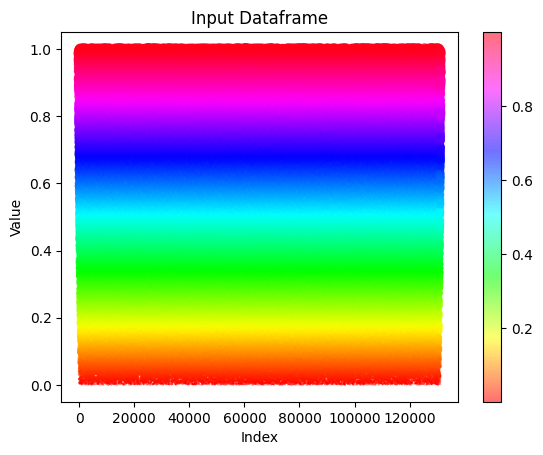

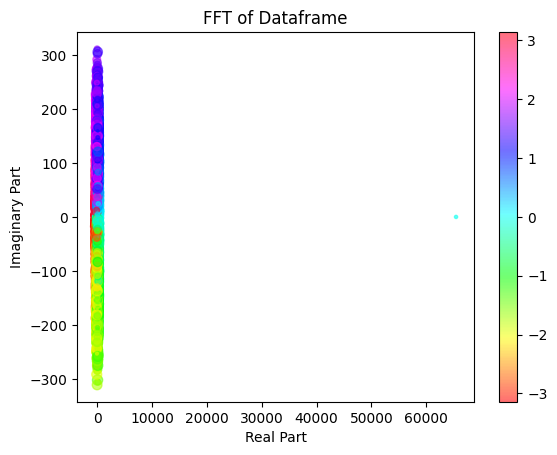

In [22]:
# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 55

# Plot the input dataframe using scatter plot
plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

# Calculate magnitude and phase of FFT output
magnitude = np.abs(X)
phase = np.angle(X)

# Plot the FFT output using scatter plot
plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
plt.title("FFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


MovieWriter stderr:
C:/aws/fft_animation.mp4: Protocol not found



Traceback (most recent call last):
  Cell In[34], line 41
    ani.save('C:/aws/fft_animation.mp4', writer=writer)
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:1064 in save
    with mpl.rc_context({'savefig.bbox': None}), \
  File /opt/conda/lib/python3.10/contextlib.py:153 in __exit__
    self.gen.throw(typ, value, traceback)
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:233 in saving
    self.finish()
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:347 in finish
    raise subprocess.CalledProcessError(
CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-y', 'C:/aws/fft_animation.mp4']' returned non-zero exit status 1.

Use %tb to get the full traceback.


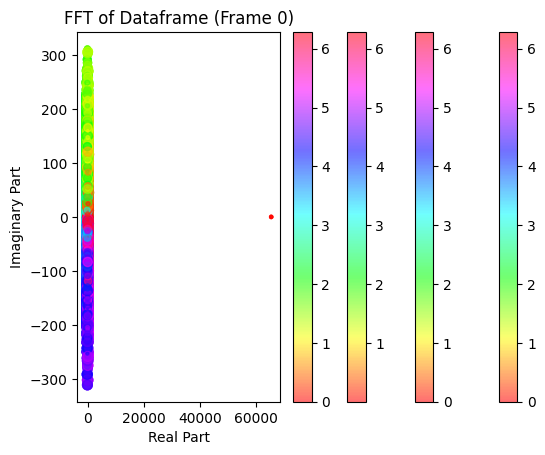

In [34]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

# Generate a random input dataframe
np.random.seed(2**32 - 1)
df = pd.DataFrame({'x': np.random.rand(2**17)})

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 55

# Calculate the FFT of the dataframe using numpy
X = np.fft.fft(df['x'].values)

# Calculate magnitude and phase of FFT output
magnitude = np.abs(X)
phase = np.angle(X)

# Define a function to update the scatter plot for each frame of the animation
def update(frame):
    # Shift the phase of the FFT output
    shifted_phase = phase + (frame * 0.1)
    # Update the color of the scatter plot based on the shifted phase
    colors = shifted_phase % (2 * np.pi)
    # Plot the scatter plot with the updated colors
    plt.scatter(np.real(X), np.imag(X), c=colors, cmap='hsv', s=sizes, alpha=0.5618033)
    plt.title("FFT of Dataframe (Frame {})".format(frame))
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.colorbar()

# Create the animation object
ani = animation.FuncAnimation(plt.gcf(), update, frames=100, interval=50)

# Set up the movie writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, bitrate=1800)

# Save the animation as an mp4 video in the C:\aws directory
ani.save('C:/aws/fft_animation.mp4', writer=writer)

# Show the final plot
plt.show()


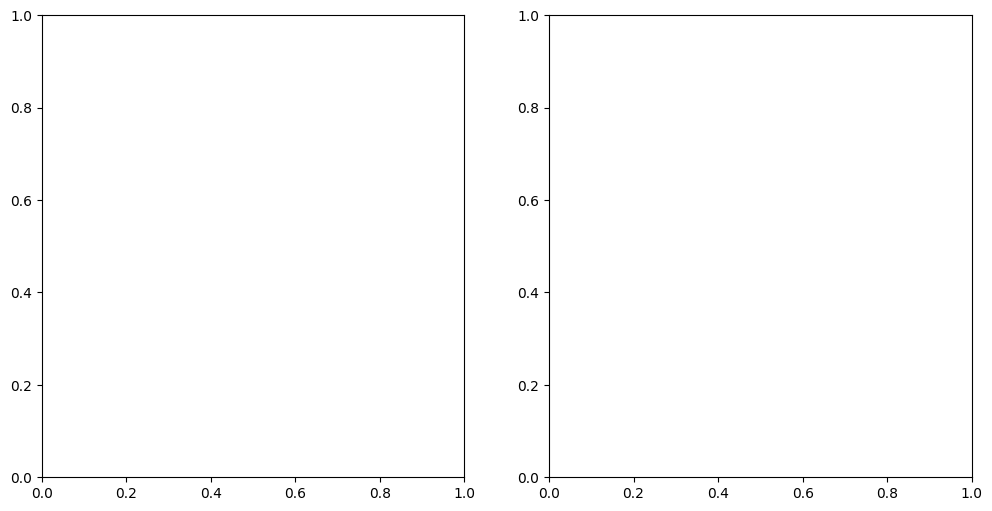

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 100

# Initialize the input dataframe and FFT output
df = pd.DataFrame({'x': []})
X = np.array([])

def animate(i):
    global df, X
    
    # Increase the size of the input dataframe by a factor of 2
    if len(df) == 0:
        df = pd.DataFrame({'x': np.random.rand(1)})
    else:
        df = pd.concat([df, pd.DataFrame({'x': np.random.rand(len(df) * 2)})], ignore_index=True)
    
    # Calculate the FFT of the dataframe using numpy
    X = np.fft.fft(df['x'].values)

    # Clear the plots
    ax1.clear()
    ax2.clear()
    
    # Plot the input dataframe using scatter plot
    ax1.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
    ax1.set_title("Input Dataframe")
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Value")
    ax1.colorbar()
    
    # Plot the FFT output using scatter plot
    ax2.scatter(np.real(X), np.imag(X), c=np.angle(X), cmap='hsv', s=sizes, alpha=0.5618033)
    ax2.set_title("FFT of Dataframe")
    ax2.set_xlabel("Real Part")
    ax2.set_ylabel("Imaginary Part")
    ax2.colorbar()

# Set up the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500)

# Show the animation
plt.show()


/opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


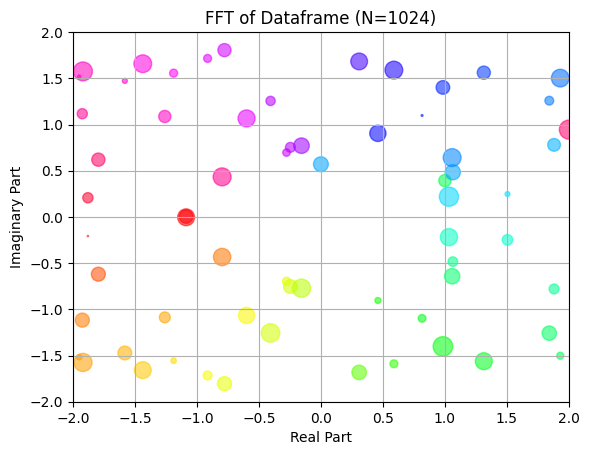

In [28]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

# Create a figure and axis object
fig, ax = plt.subplots()

# Define a function to update the plot with each frame of the animation
def update(frame):
    # Generate a random input dataframe
    df = pd.DataFrame({'x': np.random.rand(2**(frame+1))})

    # Calculate the FFT of the dataframe using numpy
    X = np.fft.fft(df['x'].values)

    # Define the size of each marker based on the magnitude of each element in the dataframe
    sizes = np.abs(df['x'].values) * 200

    # Clear the axis and plot the input dataframe using scatter plot
    ax.clear()
    ax.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
    ax.set_title("Input Dataframe (N={})".format(2**(frame+1)))
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.set_xlim(0, 2**(frame+1))
    ax.set_ylim(0, 1)
    ax.grid(True)

    # Calculate magnitude and phase of FFT output
    magnitude = np.abs(X)
    phase = np.angle(X)

    # Plot the FFT output using scatter plot
    ax.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
    ax.set_title("FFT of Dataframe (N={})".format(2**(frame+1)))
    ax.set_xlabel("Real Part")
    ax.set_ylabel("Imaginary Part")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.grid(True)

    return ax

# Create an animation object with 10 frames and a 100ms delay between frames
ani = animation.FuncAnimation(fig, update, frames=10, interval=100)

# Save the animation as an mp4 video file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('fft_animation.mp4', writer=writer)

plt.show()


MovieWriter stderr:
file://C:/aws/fft_animation.mp4: No such file or directory



Traceback (most recent call last):
  Cell In[32], line 51
    ani.save('file://C:/aws/fft_animation.mp4', writer=writer)
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:1064 in save
    with mpl.rc_context({'savefig.bbox': None}), \
  File /opt/conda/lib/python3.10/contextlib.py:153 in __exit__
    self.gen.throw(typ, value, traceback)
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:233 in saving
    self.finish()
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:347 in finish
    raise subprocess.CalledProcessError(
CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', 'file://C:/aws/fft_animation.mp4']' returned non-zero exit status 1.

Use %tb to get the full traceback.


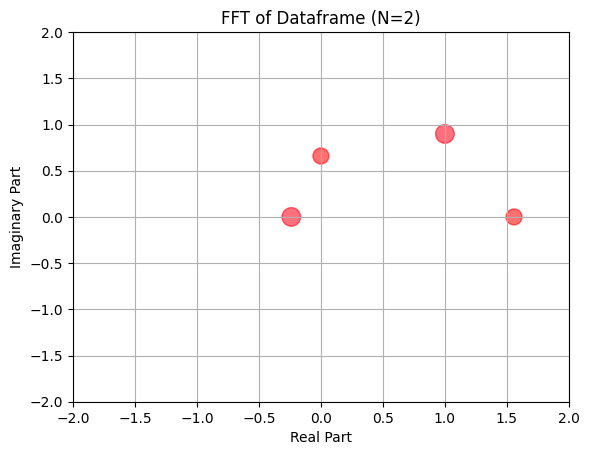

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

# Create a figure and axis object
fig, ax = plt.subplots()

# Define a function to update the plot with each frame of the animation
def update(frame):
    # Generate a random input dataframe
    df = pd.DataFrame({'x': np.random.rand(2**(frame+1))})

    # Calculate the FFT of the dataframe using numpy
    X = np.fft.fft(df['x'].values)

    # Define the size of each marker based on the magnitude of each element in the dataframe
    sizes = np.abs(df['x'].values) * 200

    # Clear the axis and plot the input dataframe using scatter plot
    ax.clear()
    ax.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
    ax.set_title("Input Dataframe (N={})".format(2**(frame+1)))
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.set_xlim(0, 2**(frame+1))
    ax.set_ylim(0, 1)
    ax.grid(True)

    # Calculate magnitude and phase of FFT output
    magnitude = np.abs(X)
    phase = np.angle(X)

    # Plot the FFT output using scatter plot
    ax.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
    ax.set_title("FFT of Dataframe (N={})".format(2**(frame+1)))
    ax.set_xlabel("Real Part")
    ax.set_ylabel("Imaginary Part")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.grid(True)

    return ax

# Create an animation object with 10 frames and a 100ms delay between frames
ani = animation.FuncAnimation(fig, update, frames=10, interval=100)

# Save the animation as an mp4 video file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('file://C:/aws/fft_animation.mp4', writer=writer)

# Display the animation in the plot window
plt.show()


MovieWriter stderr:
C:\aws\fft_animation.mp4: Protocol not found



Traceback (most recent call last):
  Cell In[33], line 51
    ani.save('C:\\aws\\fft_animation.mp4', writer=writer)
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:1064 in save
    with mpl.rc_context({'savefig.bbox': None}), \
  File /opt/conda/lib/python3.10/contextlib.py:153 in __exit__
    self.gen.throw(typ, value, traceback)
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:233 in saving
    self.finish()
  File /opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:347 in finish
    raise subprocess.CalledProcessError(
CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', 'C:\\aws\\fft_animation.mp4']' returned non-zero exit status 1.

Use %tb to get the full traceback.


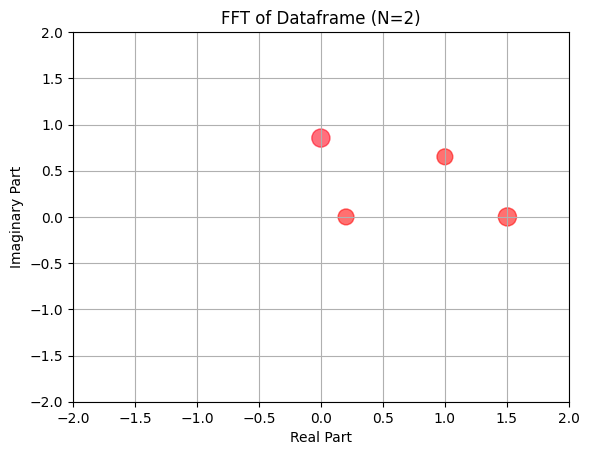

In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

# Create a figure and axis object
fig, ax = plt.subplots()

# Define a function to update the plot with each frame of the animation
def update(frame):
    # Generate a random input dataframe
    df = pd.DataFrame({'x': np.random.rand(2**(frame+1))})

    # Calculate the FFT of the dataframe using numpy
    X = np.fft.fft(df['x'].values)

    # Define the size of each marker based on the magnitude of each element in the dataframe
    sizes = np.abs(df['x'].values) * 200

    # Clear the axis and plot the input dataframe using scatter plot
    ax.clear()
    ax.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5618033)
    ax.set_title("Input Dataframe (N={})".format(2**(frame+1)))
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.set_xlim(0, 2**(frame+1))
    ax.set_ylim(0, 1)
    ax.grid(True)

    # Calculate magnitude and phase of FFT output
    magnitude = np.abs(X)
    phase = np.angle(X)

    # Plot the FFT output using scatter plot
    ax.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
    ax.set_title("FFT of Dataframe (N={})".format(2**(frame+1)))
    ax.set_xlabel("Real Part")
    ax.set_ylabel("Imaginary Part")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.grid(True)

    return ax

# Create an animation object with 10 frames and a 100ms delay between frames
ani = animation.FuncAnimation(fig, update, frames=10, interval=100)

# Save the animation as an mp4 video file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('C:\\aws\\fft_animation.mp4', writer=writer)

# Display the animation in the plot window
plt.show()


In [139]:
!pip install visualpython

!pip install jupyterlab-visualpython

     |████████████████████████████████| 7.1 MB 2.8 MB/s eta 0:00:01


In [140]:
from visual import *
mybox = box(pos=(0,0,0), length=4, height=2, width=3, axis=(-0.1,-0.1,0.1) ) 
scene.title = "VPython: cuboid"

Traceback (most recent call last):
  Input In [140] in <cell line: 1>
    from visual import *
ModuleNotFoundError: No module named 'visual'

Use %tb to get the full traceback.


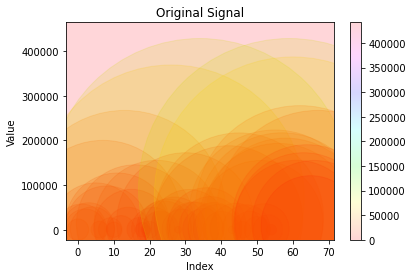

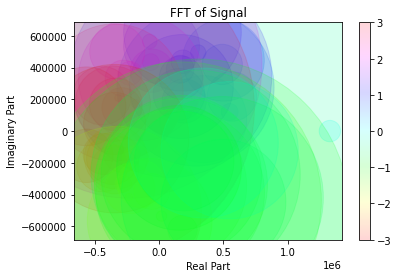

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('930-data-export.csv', delimiter=',', parse_dates=[1])

# Get the signal
signal = df['Selected Hour Demand (MWh)']

# Calculate FFT using numpy
X = np.fft.fft(df['Selected Hour Demand (MWh)'].values)

# Define marker sizes
sizes = np.abs(df['Selected Hour Demand (MWh)'].values) * 200

# Plot original signal
plt.scatter(df.index, df['Selected Hour Demand (MWh)'], c=df['Selected Hour Demand (MWh)'], cmap='hsv', s=signal, alpha=0.1618033)
plt.title("Original Signal")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

# Calculate magnitude and phase
magnitude = np.abs(X)
phase = np.angle(X)

# Plot FFT
plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=signal, alpha=0.1618033)
plt.title("FFT of Signal")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


In [141]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

fib_seq = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

def update(frame, fig, X, sizes):
    np.random.seed(fib_seq[frame])
    df = pd.DataFrame({'x': np.random.rand(fib_seq[frame])})
    X = np.fft.fft(df['x'].values)
    sizes = np.abs(df['x'].values) * 200
    plt.clf()
    plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.1618033)
    plt.title("Input Dataframe")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.colorbar()

fig = plt.figure()
X = np.array([])
sizes = np.array([])
ani = animation.FuncAnimation(fig, update, frames=len(fib_seq), interval=500, fargs=(fig, X, sizes))
plt.show()


<Figure size 432x288 with 0 Axes>

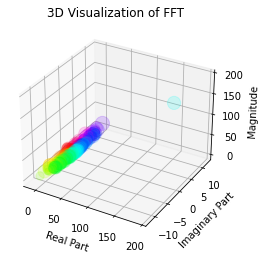

In [87]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.real(X), np.imag(X), magnitude, c=phase, cmap='hsv', s=sizes, alpha=0.168033)
ax.set_title("3D Visualization of FFT")
ax.set_xlabel("Real Part")
ax.set_ylabel("Imaginary Part")
ax.set_zlabel("Magnitude")
plt.show()


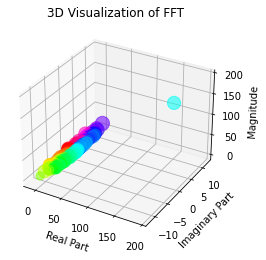

In [83]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.real(X), np.imag(X), magnitude, c=phase, cmap='hsv', s=sizes, alpha=0.5618033)
ax.set_title("3D Visualization of FFT")
ax.set_xlabel("Real Part")
ax.set_ylabel("Imaginary Part")
ax.set_zlabel("Magnitude")
plt.show()


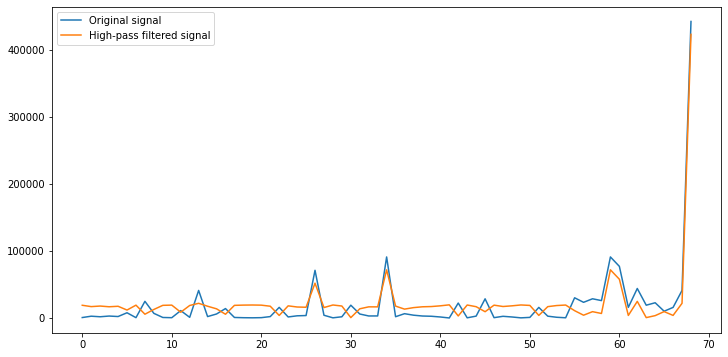

In [37]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('930-data-export.csv', delimiter=',', parse_dates=[1])

# Get the signal
signal = df['Selected Hour Demand (MWh)']

# Perform FFT
fft_signal = np.fft.fft(signal)

# Define the high-pass filter cutoff frequency
cutoff_frequency = 0.1

# Get the length of the signal
N = len(signal)

# Get the frequency array
freq = np.fft.fftfreq(N, 1/(60*60))

# Get the high-pass filter mask
mask = np.abs(freq) > cutoff_frequency

# Apply the high-pass filter mask
fft_signal[np.logical_not(mask)] = 0

# Perform inverse FFT to get back to the time domain
filtered_signal = np.fft.ifft(fft_signal)


# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(signal, label='Original signal')
plt.plot(np.abs(filtered_signal), label='High-pass filtered signal')
plt.legend()
plt.show()

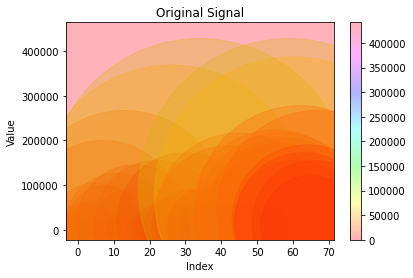

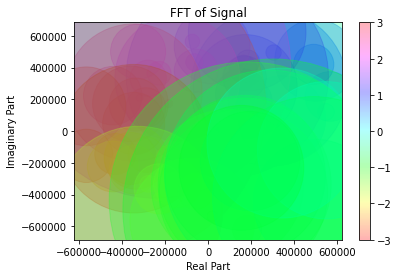

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('930-data-export.csv', delimiter=',', parse_dates=[1])

# Get the signal
signal = df['Selected Hour Demand (MWh)']

# Perform FFT
fft_signal = np.fft.fft(signal)

# Define the high-pass filter cutoff frequency
cutoff_frequency = 0.1

# Get the length of the signal
N = len(signal)

# Get the frequency array
freq = np.fft.fftfreq(N, 1/(60*60))

# Get the high-pass filter mask
mask = np.abs(freq) > cutoff_frequency

# Apply the high-pass filter mask
fft_signal[np.logical_not(mask)] = 0

# Perform inverse FFT to get back to the time domain
filtered_signal = np.fft.ifft(fft_signal)

# Define marker sizes
sizes = np.abs(signal) 

# Plot original signal
plt.scatter(df.index, signal, c=signal, cmap='hsv', s=signal, alpha=0.3)
plt.title("Original Signal")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

# Calculate magnitude and phase
magnitude = np.abs(fft_signal)
phase = np.angle(fft_signal)

# Plot FFT
plt.scatter(np.real(fft_signal), np.imag(fft_signal), c=phase, cmap='hsv', s=signal, alpha=0.3)
plt.title("FFT of Signal")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


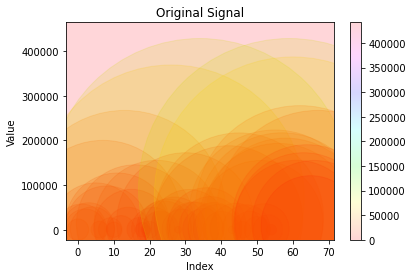

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('930-data-export.csv', delimiter=',', parse_dates=[1])

# Get the signal
signal = df['Selected Hour Demand (MWh)']

# Plot the original signal as color dots with size increasing based on occurence
plt.scatter(df.index, signal, c=signal, cmap='hsv', s=signal , alpha=0.1618033)
plt.title("Original Signal")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()


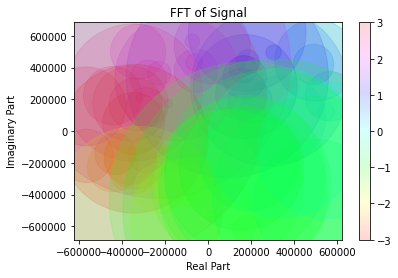

In [58]:
# Plot FFT
plt.scatter(np.real(fft_signal), np.imag(fft_signal), c=phase, cmap='hsv', s=signal, alpha=0.1618033)
plt.title("FFT of Signal")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


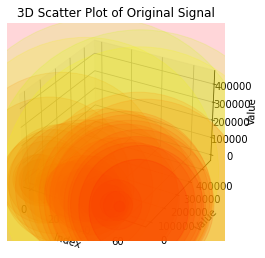

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.index, signal, signal, c=signal, cmap='hsv', s=signal, alpha=0.1618033)
ax.set_title("3D Scatter Plot of Original Signal")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.set_zlabel("Value")
plt.show()


In [132]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

# Define the Fibonacci sequence used to generate the seed values
fib_seq = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

# Define the update function for each animation frame
def update(frame):
    np.random.seed(fib_seq[frame])
    df = pd.DataFrame({'x': np.random.rand(fib_seq[frame])})
    X = np.fft.fft(df['x'].values)
    sizes = np.abs(df['x'].values) * 200
    plt.clf()
    plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.1618033)
    plt.title("Input Dataframe")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.colorbar()

# Create the animation using FuncAnimation
fig = plt.figure()
ani = animation.FuncAnimation(fig, update, frames=len(fib_seq), interval=500)
plt.show()


<Figure size 432x288 with 0 Axes>